### Table of Contents

### Data analysis (preprocessing, heap's law, zief's law, bigram)

### Word Clouds

### LDA
*  LDA over all years and logistic regression - unigram
*  LDA over 3 time period windows (~2000, ~2010, ~2020)
*  Dynamic Topic modelling

* Logistic Regression

Note
Y variable is 1 = cited above median (4), 0 = anything less than 4

In [101]:
import pickle, re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
import matplotlib.pyplot as plt
import numpy as np
import spacy

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Get the data and check it

In [103]:
unpickled_df = pd.read_pickle("C:/Users/USER/Documents/Python/NLP/extracted_data.pkl")

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* Take out the nan values

In [104]:
df = unpickled_df[unpickled_df['description'].notna()]
#df

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Corpus warm-up:

* First, make all words in abstract lower cases
* Create the corpus of abstracts

In [105]:
def column_to_lower(df, column):
    """
        Input: df and a corresponding column
        Output: converted dataframe column 
        Function: Converts all strings in a column of a dataframe to lowercases.
    """
    return df[column].str.lower()

df['description'] = column_to_lower(df, 'description')


corpus = df["description"].tolist()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-105-4fcdd0b2361c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = column_to_lower(df, 'description')


In [106]:
#check how some values look like
corpus[0]

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'facebook’s utilisation of machine learning and artificial intelligence (ai) can often identify profitable targets more quickly and more effectively than can human campaign managers. however, there is still much that marketers may do to ensure optimal placement and delivery when it comes to their facebook ad campaigns and leveraging the power of facebook’s machine learning and ai capabilities. this article discusses the some of the issues that marketers face in trying to fully utilise facebook’s machine-learning capabilities and how many marketers struggle to create campaign structures that allow them to optimise and scale their digital campaigns on facebook. this article will detail a few of these frameworks, strategies and tactics. the article does not advocate the ‘right’ framework to use but rather argues simply that having a framework will ensure better results and support learning throughout the campaign.'

In [6]:
#type(corpus[0])

In [7]:
#len(corpus)
#1028 abstracts

In [107]:
#to count the amount of words in the entire dataset, also repeating
corpus_all = []

for i in range(0,len(corpus)):
    res = re.findall(r'\w+', str(corpus[i]))
    corpus_all.extend(res)
    
#corpus_all

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
#len(corpus_all)


In [10]:
#type(corpus_all)

In [11]:
#print(corpus_all)

* Create a list all the unique words in the corpus

In [108]:
lister = []
for i in corpus_all:
    if i not in lister:
        lister.append(i)
            
#print(lister)
print("There are", len(lister), "unique words in that list")

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There are 15340 unique words in that list


* Tokenize and check the words most frequent in the entire corpus

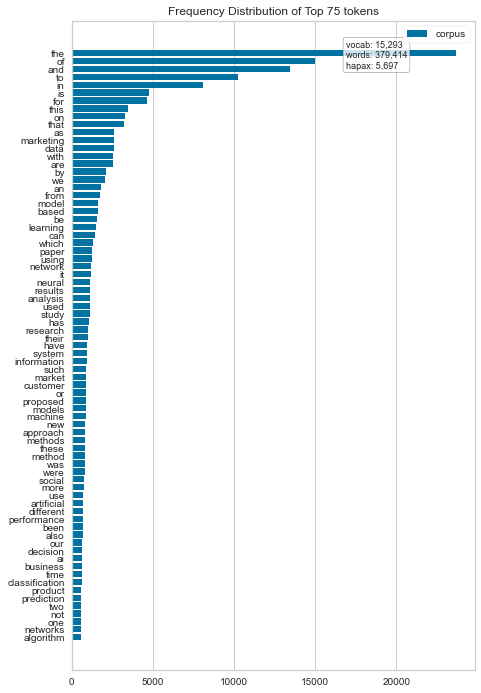

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [13]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75, size= (520, 860))
visualizer.fit(docs)
visualizer.show()

A function that takes as inputs a visualizer object and the number of words to be plotted and returns the **Zipf's law plot**

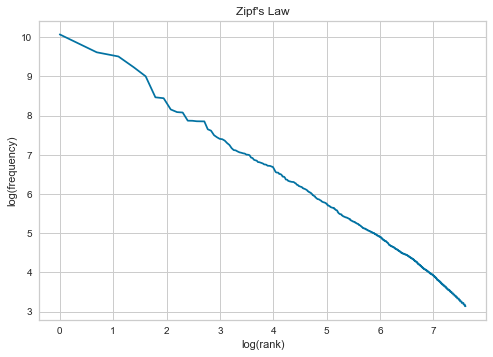

In [14]:
def zipf_law_plot(visualizer_obj, n):
    word_count = pd.DataFrame({"word":visualizer_obj.features,
                               "count":visualizer_obj.freqdist_})
    word_count = word_count.sort_values(by = "count", ascending = False)
    word_count.reset_index(inplace = True, drop = True)
    plt.plot(np.log(np.arange(1,n+1)), np.log(word_count.iloc[:n,1]))
    plt.title("Zipf's Law")
    plt.xlabel("log(rank)")
    plt.ylabel("log(frequency)")

n_words_zipf = 2000
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

### Take out english stopwords and check which are the most used words

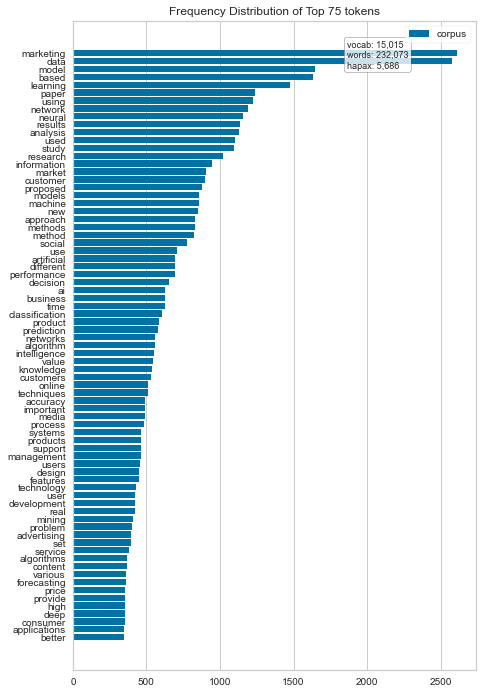

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [15]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

**Zipf's law plot** excluding English stop words

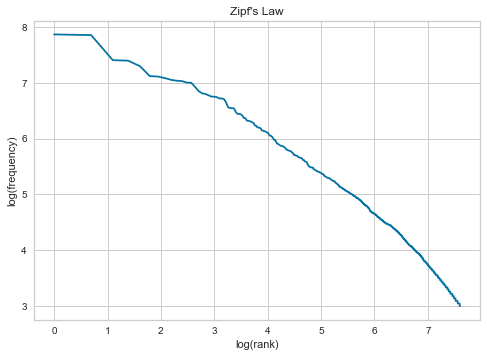

In [16]:
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

In [17]:
#from sklearn.feature_extraction import stop_words


* Check the most popular words only for some years

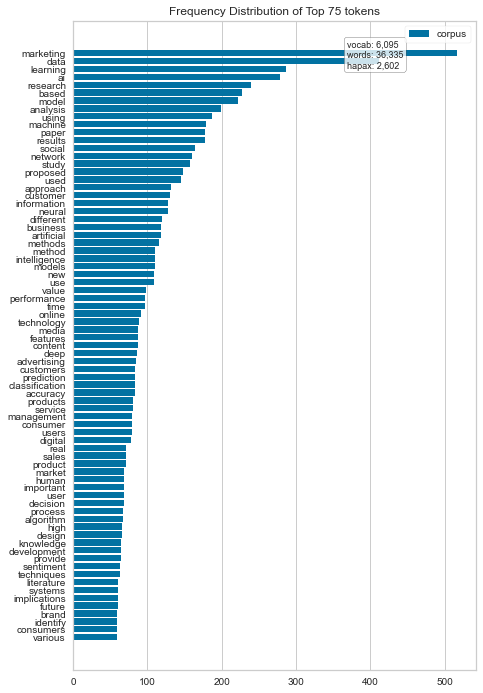

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [18]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus[200:500])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

-----

**Heap's law plot**

*** The plot shows that our corpus follows the heap's law


Text(0, 0.5, 'n of unique words')

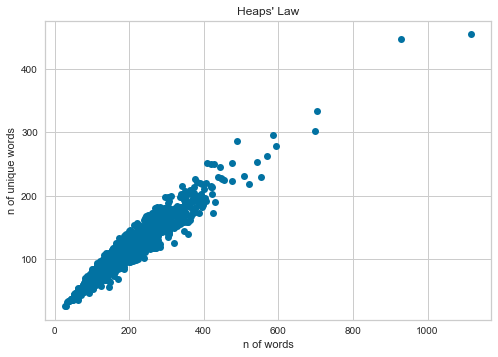

In [19]:
n_words = []
n_unique_words = []

for i in range(0,len(corpus)):
    res = [word.lower() for word in re.findall(r'\w+', corpus[i])]
    n_unique_words.append(len(set(res)))
    n_words.append(len(res))
    
plt.plot(n_words, n_unique_words, "o")
plt.title("Heaps' Law")
plt.xlabel("n of words")
plt.ylabel("n of unique words")

----

### Pre-processing:  Lemmatizing & Tokenization

In [109]:
import spacy
spacyen = spacy.load('en_core_web_sm')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(corpus)):
    corpus[idx] = tokenizer.tokenize(str(corpus[idx]))

corpus2 = [[token for token in doc if not token.isnumeric()] for doc in corpus]

corpus2 = [[token for token in doc if len(token) > 1] for doc in corpus]

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
corpus2 = [[lemmatizer.lemmatize(token) for token in doc] for doc in corpus2]

#corpus_all_lower_lemma

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [118]:
from gensim.models import Phrases
print(corpus2[1])
bigram = Phrases(corpus2, min_count = 20)
for idx in range(len(corpus2)):
    for token in bigram[corpus2[idx]]:
        if "_" in token:
            corpus2[idx].append(str(token))

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['within', 'digital', 'marketing', 'marketing', 'intelligence', 'foster', 'two', 'major', 'development', 'first', 'and', 'even', 'in', 'the', 'absence', 'of', 'key', 'performance', 'indicator', 'it', 'improves', 'marketing', 'efficiency', 'a', 'life', 'cycle', 'marketing', 'automated', 'price', 'adjustment', 'and', 'programmatic', 'advertising', 'based', 'on', 'artificial', 'intelligence', 'ai', 'all', 'support', 'the', 'vision', 'of', 'fully', 'standardised', 'marketing', 'automation', 'with', 'real', 'time', 'optimised', 'customer', 'centricity', 'secondly', 'new', 'marketing', 'area', 'such', 'a', 'viral', 'marketing', 'social', 'medium', 'marketing', 'and', 'content', 'marketing', 'emphasise', 'the', 'increasing', 'significance', 'of', 'creative', 'marketing', 'looking', 'for', 'paradigmatic', 'principle', 'reveals', 'that', 'performance', 'marketing', 'is', 'shaped', 'by', 'analytic', 'processual', 'and', 'lean', 'thinking', 'in', 'contrast', 'creative', 'marketing', 'depends', 'o

In [119]:
print(corpus2[1])

['within', 'digital', 'marketing', 'marketing', 'intelligence', 'foster', 'two', 'major', 'development', 'first', 'and', 'even', 'in', 'the', 'absence', 'of', 'key', 'performance', 'indicator', 'it', 'improves', 'marketing', 'efficiency', 'a', 'life', 'cycle', 'marketing', 'automated', 'price', 'adjustment', 'and', 'programmatic', 'advertising', 'based', 'on', 'artificial', 'intelligence', 'ai', 'all', 'support', 'the', 'vision', 'of', 'fully', 'standardised', 'marketing', 'automation', 'with', 'real', 'time', 'optimised', 'customer', 'centricity', 'secondly', 'new', 'marketing', 'area', 'such', 'a', 'viral', 'marketing', 'social', 'medium', 'marketing', 'and', 'content', 'marketing', 'emphasise', 'the', 'increasing', 'significance', 'of', 'creative', 'marketing', 'looking', 'for', 'paradigmatic', 'principle', 'reveals', 'that', 'performance', 'marketing', 'is', 'shaped', 'by', 'analytic', 'processual', 'and', 'lean', 'thinking', 'in', 'contrast', 'creative', 'marketing', 'depends', 'o

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Divide corpus into sentences

In [25]:
re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0])

['facebook’s utilisation of machine learning and artificial intelligence (ai) can often identify profitable targets more quickly and more effectively than can human campaign manage',
 'however, there is still much that marketers may do to ensure optimal placement and delivery when it comes to their facebook ad campaigns and leveraging the power of facebook’s machine learning and ai capabiliti',
 'this article discusses the some of the issues that marketers face in trying to fully utilise facebook’s machine-learning capabilities and how many marketers struggle to create campaign structures that allow them to optimise and scale their digital campaigns on facebo',
 'this article will detail a few of these frameworks, strategies and tacti',
 'the article does not advocate the ‘right’ framework to use but rather argues simply that having a framework will ensure better results and support learning throughout the campaign.']

In [26]:
len(re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0]))

5

In [27]:
corpus_sentences = []

for i in range(0,len(corpus)):
    #split the current abstract into sentences
    sentences = re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[i])
    #nr of sentences in current abstract
    nr_of_sentences = len(sentences)
    corpus_sentences.append(nr_of_sentences)

In [28]:
df.loc[:,'nr_sentences_abstract']=corpus_sentences

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [29]:
df.nr_sentences_abstract.describe()

count    2048.000000
mean        7.957520
std         3.338083
min         1.000000
25%         6.000000
50%         7.000000
75%        10.000000
max        41.000000
Name: nr_sentences_abstract, dtype: float64

In [30]:
#print(df.nr_sentences_abstract.sum(), "total number of sentences")
#print(df.nr_sentences_abstract.median(), "median")
#print(df.nr_sentences_abstract.describe())

In [31]:
 #print(df.loc[df['nr_sentences_abstract'] == 46]['description'].values)

In [32]:
df.loc[df['nr_sentences_abstract'] == 46]['description']

Series([], Name: description, dtype: object)

In [33]:
#re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', df.loc[1922]["description"])

In [34]:
#We should also extract the keywords maybe

In [35]:
keywords = df["authkeywords"].tolist()

In [36]:
keywords[1]

'Creativity | Marketing 3.0 | Marketing 4.0 | Marketing intelligence | Paradigm | Performance marketing'

In [37]:
keywords_all = []

for i in range(0, len(keywords)):
    res = re.findall(r'\w+[a-zA-Z][ ][|]', str(keywords[i]))
    keywords_all.extend(res)
    
#keywords_all

----

## Word cloud


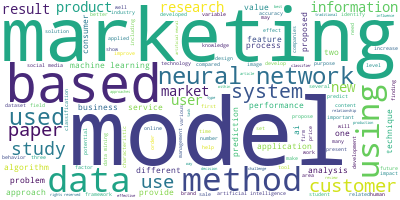

In [38]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

long_string = ','.join(list(df['description'].values))
#print(long_string[1:100])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

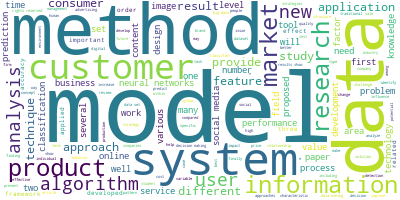

In [39]:
#This is the wordcloud without the keywords

REMOVE_LIST = ["artificial intelligence", "artifical", "intelligence", "machine", "learning", "machine learning",
              "marketing", "deep learning", "deep", "learning", "neural network", "nueral", "network", "AI", "based", "using",
              "used", "use"]

REMOVE_LIST = STOPWORDS.union(REMOVE_LIST)

remove = '|'.join(REMOVE_LIST)
    
regex = re.compile(r'\b('+remove+r')\b', flags=re.IGNORECASE)

out1= [regex.sub("", str(x)) for x in df['description']]

#print(out1[1])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

out = ','.join(list(out1))

wordcloud.generate(out)

wordcloud.to_image()

# LDA - unigram

In [74]:
import gensim

from gensim.utils import simple_preprocess

out1 = df['description'].values #unigram

def sent_to_words(sentences):
    for sentence in sentences:
        #deacc = True -> removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
            if word not in STOPWORDS] for doc in texts]

data_words = list(sent_to_words(out1))

data_words = remove_stopwords(data_words)

#print(data_words[:1][0][:30])

for i in range(len(data_words)):
    for j in range(len(data_words[i])):
        each1 = lemmatizer.lemmatize(data_words[i][j])
        data_words[i][j] = each1

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]


#print(corpus[:1][0][:30])

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
from pprint import pprint

num_topics = 15

lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50, decay = 0.6)

lda_model.save('lda_model.model')

doc_lda = lda_model[corpus]


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
print(lda_model.print_topics(20, num_words = 20))

[(0, '0.023*"drug" + 0.009*"health" + 0.008*"data" + 0.008*"method" + 0.008*"system" + 0.007*"report" + 0.007*"adverse" + 0.007*"result" + 0.006*"safety" + 0.006*"signal" + 0.005*"adr" + 0.005*"cigarette" + 0.005*"medical" + 0.004*"event" + 0.004*"using" + 0.004*"study" + 0.004*"post" + 0.004*"reaction" + 0.004*"effect" + 0.004*"risk"'), (1, '0.013*"drug" + 0.009*"method" + 0.007*"expression" + 0.006*"facial" + 0.006*"human" + 0.006*"recognition" + 0.006*"marketing" + 0.006*"patient" + 0.005*"using" + 0.005*"detection" + 0.004*"data" + 0.004*"image" + 0.004*"clinical" + 0.004*"study" + 0.004*"event" + 0.003*"kernel" + 0.003*"system" + 0.003*"used" + 0.003*"device" + 0.003*"information"'), (2, '0.011*"tweet" + 0.011*"learning" + 0.010*"marketing" + 0.008*"study" + 0.007*"machine" + 0.006*"metric" + 0.006*"online" + 0.006*"cigarette" + 0.005*"twitter" + 0.005*"sale" + 0.005*"health" + 0.005*"result" + 0.004*"type" + 0.004*"related" + 0.004*"method" + 0.004*"used" + 0.004*"content" + 0.00

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
#print(lda_model.print_topics(20, num_words = 15)[:10])

train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    train_vecs.append(topic_vec)
    
print(len(train_vecs))


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2048


## This cell tries interaction term - I am still figuring it out.

In [88]:
df.citedby_count.describe()

df['y']=df.citedby_count>4
#print(df['y'])

df['year'] = df['coverDate'].astype(str).str[0:4]

df['year'] = df['year'].astype(int)

df.loc[df['year'] <2000,'coverDate'] = 0

df.loc[df['year'] > 2010,'coverDate'] = 2

df.loc[(df['year']>=2000) & (df['year'] <= 2010) ,'coverDate'] = 1
#a = np.array(df.coverDate.values.tolist())
#df['coverDate'] = np.where(a < '2000-1-1', 0, a).tolist()
#year

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-88-00fdcf44ca3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=df.citedby_count>4
<ipython-input-88-00fdcf44ca3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

## Logistic Regression - Still need to add the sentiments

### X: Topic distribution per corpus, year, Sentiment, author publication score, first author's university rank, 

### y: citation number

### Things to do
* k-cv to choose the optimal topic numbers
* bigram
* interaction term

### Results

We see that a normal logistic model performs the best in terms of f1 score

* We can try other diagnostics.

y should be weighted because earlier publications usually dont have 
fair chance to be cited. Thus, we weight the y variable. 
Or, we should delete the publications published after 2020-6-1

For now, no logical methods is proposed. Thus, we restrict our sample size.

In [97]:
#logistic regression - unigram
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
import numpy as np

X = np.array(train_vecs, df.coverDate)
y = np.array(df.y)


kf = KFold(10, shuffle = True, random_state = 42)

cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:443: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)


Logistic Regression Val f1: 0.545 +- 0.047
Logisitic Regression SGD Val f1: 0.563 +- 0.049
SVM Huber Val f1: 0.402 +- 0.329


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

In [46]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+str(num_topics) + '.html')

#We create a handful of LDA models with different topic values, 
#then see how these perform in the supervised classification model training
#This is specific to our goal

 We can also run HDP, which seeks to learn the correct number of topics
 from the data, that is, you don't need to provide a fixed number of topics.
 In the end, we expect to run a basic logistic regression - to be done later

When topic = 20

Logistic Regression Val f1: 0.564 +- 0.045
Logisitic Regression SGD Val f1: 0.504 +- 0.067
SVM Huber Val f1: 0.462 +- 0.304
    
When topic = 15
Logistic Regression Val f1: 0.545 +- 0.047
Logisitic Regression SGD Val f1: 0.563 +- 0.049
SVM Huber Val f1: 0.402 +- 0.329
    
When topic = 10

Logistic Regression Val f1: 0.563 +- 0.047
Logisitic Regression SGD Val f1: 0.561 +- 0.090
SVM Huber Val f1: 0.401 +- 0.328
    
When topic = 5

Logistic Regression Val f1: 0.530 +- 0.037
Logisitic Regression SGD Val f1: 0.532 +- 0.066
SVM Huber Val f1: 0.393 +- 0.321
    





## LDA - bigram

In [123]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
dictionary2 = Dictionary(corpus2)
dictionary2.filter_extremes(no_below=20, no_above=0.5)
bi_corpus = [dictionary2.doc2bow(doc) for doc in corpus2]

num_topics = 20
passes = 20

temp = dictionary2[0]  # This is only to "load" the dictionary.
id2word = dictionary2.id2token

lda_model2 = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                    chunksize = 100, passes = 50, decay = 0.6)


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

In [ ]:
print(lda_model.print_topics(20, num_words = 20))

## LDA over time

### Firstly, we divide the data in 3 windows (~2000, ~2010 ~2020)

In [48]:
#~2000

from pprint import pprint

num_topics = 20

inc = df.coverDate == 0
inc.astype(int)

corpus0 = [x for x, y in zip(corpus, inc) if y == 1]

lda_model0 = gensim.models.LdaMulticore(corpus = corpus0, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50)

lda_model0.save('lda_model0.model')

print(lda_model0.print_topics(20, num_words = 15)[:10])

doc_lda0 = lda_model0[corpus0]

train_vecs0 = []
for i in range(len(corpus0)):
    top_topics0 = (
        lda_model0.get_document_topics(corpus0[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec0 = [top_topics0[i][1] for i in range(20)]
    train_vecs0.append(topic_vec0)



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.008*"systems" + 0.007*"data" + 0.006*"decision" + 0.006*"use" + 0.006*"applications" + 0.005*"based" + 0.005*"learning" + 0.005*"support" + 0.005*"intelligent" + 0.005*"strategy" + 0.004*"new" + 0.004*"product" + 0.004*"marketing" + 0.004*"customers" + 0.004*"application"'), (1, '0.009*"systems" + 0.009*"market" + 0.008*"expert" + 0.007*"data" + 0.005*"marketing" + 0.005*"method" + 0.004*"paper" + 0.004*"process" + 0.004*"network" + 0.004*"liability" + 0.004*"neural" + 0.004*"using" + 0.004*"learning" + 0.004*"methods" + 0.004*"properties"'), (2, '0.008*"variables" + 0.007*"neural" + 0.006*"data" + 0.006*"system" + 0.005*"model" + 0.005*"marketing" + 0.005*"jalq" + 0.004*"sales" + 0.004*"paper" + 0.004*"network" + 0.004*"networks" + 0.004*"results" + 0.004*"people" + 0.003*"using" + 0.003*"intelligent"'), (3, '0.009*"will" + 0.006*"manufacturing" + 0.006*"market" + 0.006*"technology" + 0.006*"used" + 0.005*"system" + 0.005*"production" + 0.005*"new" + 0.005*"business" + 0.004*"

In [49]:
#~2010

from pprint import pprint

num_topics = 20

inc = df.coverDate == 1
inc.astype(int)

corpus1 = [x for x, y in zip(corpus, inc) if y == 1]

lda_model1 = gensim.models.LdaMulticore(corpus = corpus1, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50)

lda_model1.save('lda_model1.model')

print(lda_model1.print_topics(20, num_words = 15)[:10])

doc_lda1 = lda_model1[corpus1]

train_vecs1 = []
for i in range(len(corpus1)):
    top_topics1 = (
        lda_model1.get_document_topics(corpus1[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec1 = [top_topics1[i][1] for i in range(20)]
    train_vecs1.append(topic_vec1)



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.018*"decision" + 0.012*"knowledge" + 0.008*"model" + 0.007*"process" + 0.006*"models" + 0.006*"trees" + 0.006*"marketing" + 0.005*"two" + 0.005*"used" + 0.004*"systems" + 0.004*"sorting" + 0.004*"som" + 0.004*"paper" + 0.004*"based" + 0.004*"system"'), (1, '0.018*"marketing" + 0.011*"system" + 0.009*"systems" + 0.009*"knowledge" + 0.008*"process" + 0.008*"research" + 0.007*"paper" + 0.007*"market" + 0.006*"decision" + 0.006*"framework" + 0.006*"management" + 0.006*"support" + 0.005*"information" + 0.005*"hybrid" + 0.004*"problem"'), (2, '0.007*"blogs" + 0.005*"reserve" + 0.005*"blog" + 0.004*"problem" + 0.004*"combinatorial" + 0.003*"reliability" + 0.003*"search" + 0.002*"branch" + 0.002*"specialized" + 0.002*"double" + 0.002*"bound" + 0.002*"bounds" + 0.002*"generator" + 0.002*"scheduling" + 0.002*"auctions"'), (3, '0.011*"learning" + 0.008*"market" + 0.006*"strategy" + 0.006*"service" + 0.005*"museum" + 0.005*"data" + 0.005*"negotiation" + 0.005*"criteria" + 0.005*"markets" +

In [50]:
#~2010

from pprint import pprint

num_topics = 20

inc = df.coverDate == 1
inc.astype(int)

corpus1 = [x for x, y in zip(corpus, inc) if y == 1]

lda_model1 = gensim.models.LdaMulticore(corpus = corpus1, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50)

lda_model1.save('lda_model1.model')



doc_lda1 = lda_model1[corpus1]

train_vecs1 = []
for i in range(len(corpus1)):
    top_topics1 = (
        lda_model1.get_document_topics(corpus1[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec1 = [top_topics1[i][1] for i in range(20)]
    train_vecs1.append(topic_vec1)



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
'''
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model0, corpus0, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+str(num_topics) + '.html')



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-51-94d9b67b8bd6>, line 20)

In [ ]:
print(lda_model1.print_topics(20, num_words = 5))